In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#load data from text file
data = np.loadtxt("Exp1_Dataset.txt",delimiter=",")
data = np.array(data)

In [6]:
#seperate the input (X) and output (Y)
X = data[::,:1]
Y = data[::,1:]

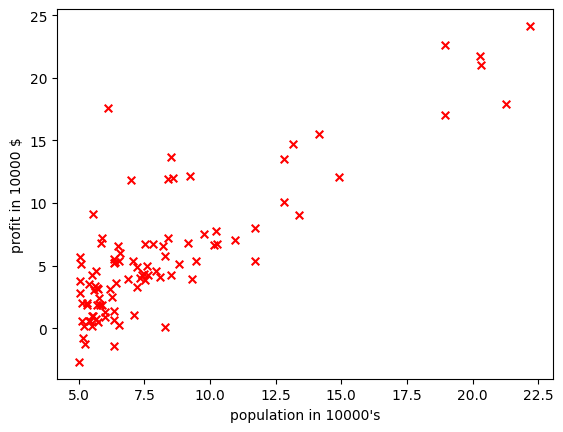

In [7]:
plt.scatter(X.transpose(),Y.transpose(),30,color="red",marker="x")
plt.xlabel("population in 10000's")
plt.ylabel("profit in 10000 $")
plt.show()

In [8]:
# introduce weights of hypothesis (randomly initialize)
Theta = np.random.rand(1,2)
# m is total example set , n is number of features
m,n = X.shape
# add bias to input matrix by simple make X0 = 1 for all
X_bias = np.ones((m,2))
X_bias[::,1:] = X
# output first 5 X_bias examples
X_bias[0:3,:]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186]])

In [9]:
#define function to find cost
def cost(X_bias,Y,Theta):
    m,n = X.shape
    hypothesis = X_bias.dot(Theta.transpose())
    return (1/(2.0*m))*((np.square(hypothesis-Y)).sum(axis=0))

In [10]:
#function gradient descent algorithm from minimizing theta
def gradientDescent(X_bias,Y,Theta,iterations,alpha):
    count = 1
    cost_log = np.array([])
    while(count <= iterations):
        hypothesis = X_bias.dot(Theta.transpose())
        temp0 = Theta[0,0] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,0:1])).sum(axis=0)
        temp1 = Theta[0,1] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,-1:])).sum(axis=0)
        Theta[0,0] = temp0
        Theta[0,1] = temp1
        cost_log = np.append(cost_log,cost(X_bias,Y,Theta))
        count = count + 1
    plt.plot(np.linspace(1,iterations,iterations,endpoint=True),cost_log)
    plt.title("Iteration vs Cost graph ")
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost function")
    plt.show()
    return Theta

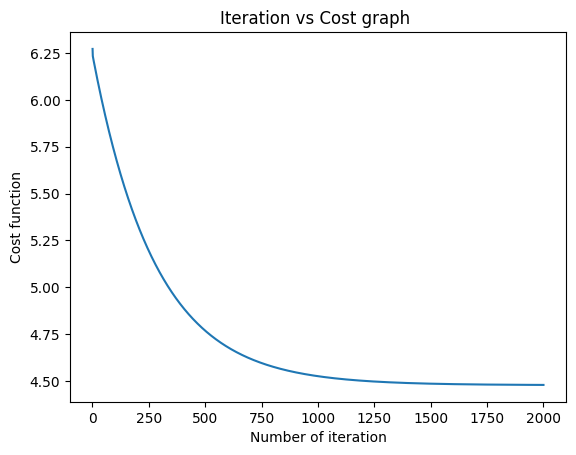

In [11]:
alpha = 0.01
iterations = 2000 #the value of iterations is 1500 enough. 2000 uses for demonstration
Theta = gradientDescent(X_bias,Y,Theta,iterations,alpha)

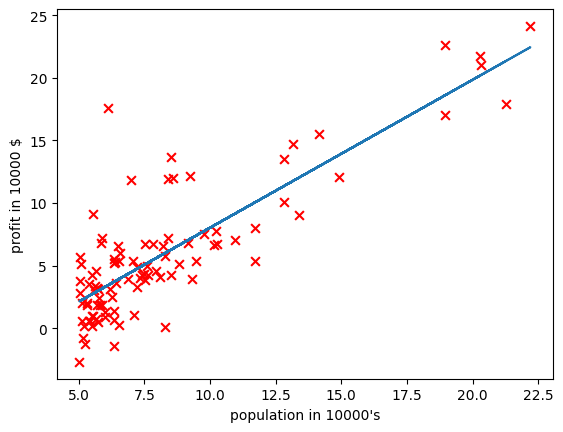

In [12]:
# Plot showing hypothesis 
plt.scatter(X.transpose(),Y.transpose(),40,color="red",marker="x")
X_axis = X
Y_axis = X_bias.dot(Theta.transpose())
plt.plot(X_axis,Y_axis)
plt.xlabel("population in 10000's")
plt.ylabel("profit in 10000 $")
plt.show()

In [13]:
# predict the profit for city with 35000 and 75000 people
X_test = np.array([[1,3.5],[1,7.5]])
hypothesis = X_test.dot(Theta.transpose())
print ('profit from 35000 people city is ',hypothesis[0,0]*10000,'$')
print ('profit from 75000 people city is ',hypothesis[1,0]*10000,'$')

profit from 35000 people city is  3572.704654751524 $
profit from 75000 people city is  50814.149159540044 $
